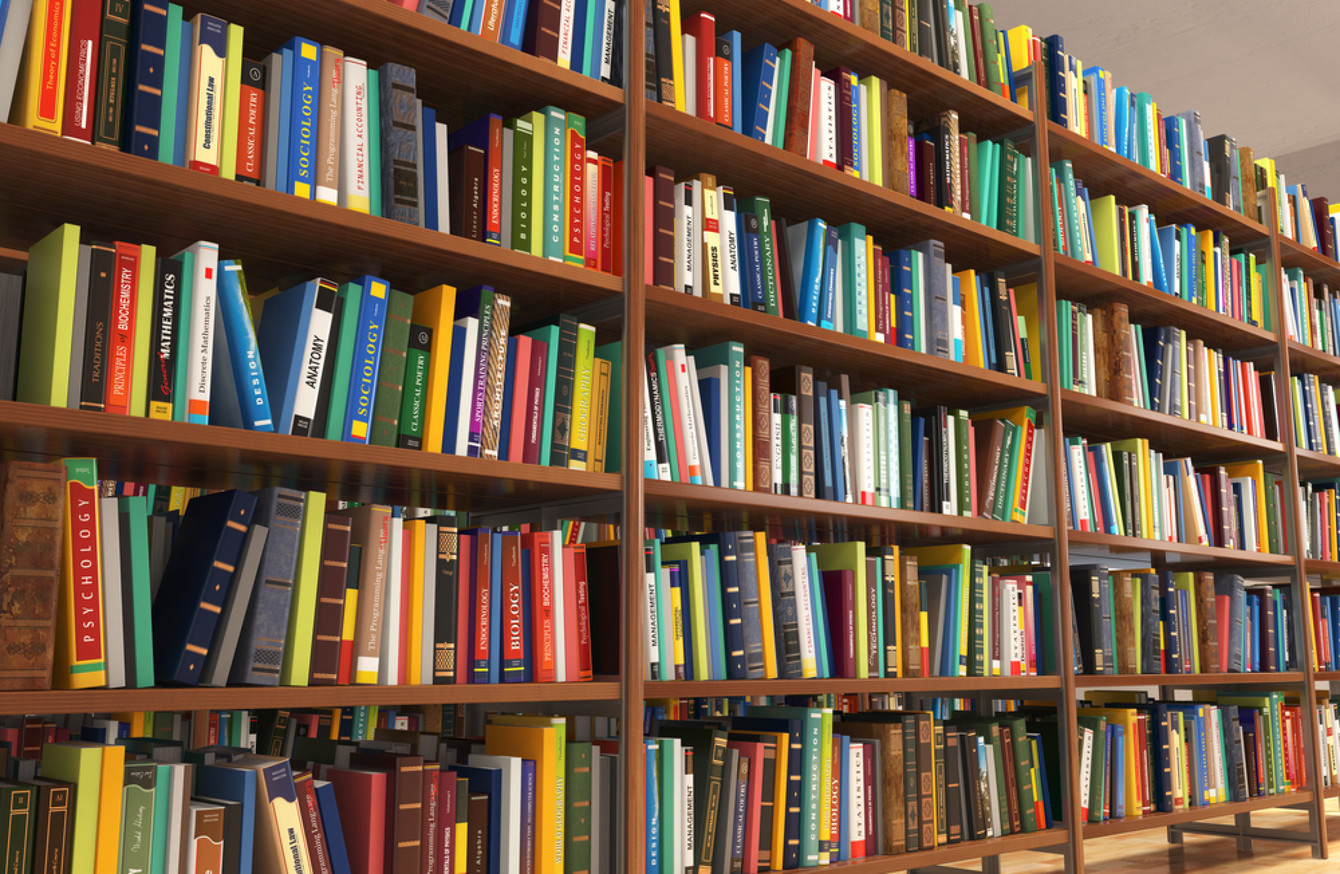

### Recommendation systems are among the most popular applications of data science. They are used to predict the Rating or Preference that a user would give to an item.

### Almost every major company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on auto play, and Facebook uses it to recommend pages to like and people to follow.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

print(ratings.shape)
print(list(ratings.columns))

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


(1149780, 3)
['userID', 'ISBN', 'bookRating']


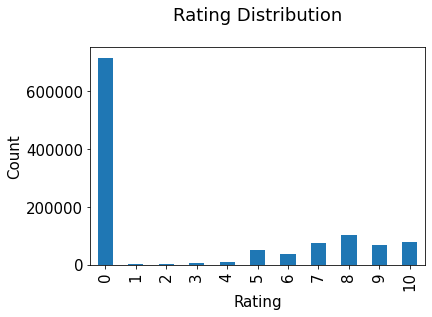

In [7]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [8]:
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


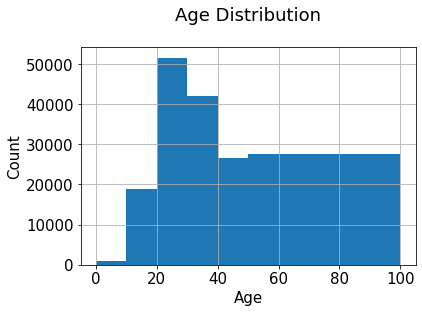

In [9]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [10]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

# Collaborative Filtering Using k-Nearest Neighbors (kNN)

kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors.

For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user.

In [11]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor','imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
print(combine_book_rating.head())

   userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
2   11676  002542730X           6   
3   12538  002542730X          10   
4   13552  002542730X           0   

                                           bookTitle  \
0  Politically Correct Bedtime Stories: Modern Ta...   
1  Politically Correct Bedtime Stories: Modern Ta...   
2  Politically Correct Bedtime Stories: Modern Ta...   
3  Politically Correct Bedtime Stories: Modern Ta...   
4  Politically Correct Bedtime Stories: Modern Ta...   

                                           imageUrlS  
0  http://images.amazon.com/images/P/002542730X.0...  
1  http://images.amazon.com/images/P/002542730X.0...  
2  http://images.amazon.com/images/P/002542730X.0...  
3  http://images.amazon.com/images/P/002542730X.0...  
4  http://images.amazon.com/images/P/002542730X.0...  


In [12]:
# Group by book titles and create a new column for total rating count

combine_book_rating = combine_book_rating.dropna(axis=0, subset=['bookTitle'])
book_ratingCount = (combine_book_rating.groupby(by=['bookTitle'])['bookRating'].count().reset_index().rename(columns={'bookRating':'totalRatingCount'})[['bookTitle','totalRatingCount']])

print(book_ratingCount.head())

                                           bookTitle  totalRatingCount
0   A Light in the Storm: The Civil War Diary of ...                 2
1                              Always Have Popsicles                 1
2               Apple Magic (The Collector's series)                 1
3   Beyond IBM: Leadership Marketing and Finance ...                 1
4   Clifford Visita El Hospital (Clifford El Gran...                 1


### Combine the Rating data with the total rating count data, that gives us exactly what we need to find out which books are popular and filter out lesser-known books.

In [14]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
print(rating_with_totalRatingCount.head())

pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

   userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
2   11676  002542730X           6   
3   12538  002542730X          10   
4   13552  002542730X           0   

                                           bookTitle  \
0  Politically Correct Bedtime Stories: Modern Ta...   
1  Politically Correct Bedtime Stories: Modern Ta...   
2  Politically Correct Bedtime Stories: Modern Ta...   
3  Politically Correct Bedtime Stories: Modern Ta...   
4  Politically Correct Bedtime Stories: Modern Ta...   

                                           imageUrlS  totalRatingCount  
0  http://images.amazon.com/images/P/002542730X.0...                82  
1  http://images.amazon.com/images/P/002542730X.0...                82  
2  http://images.amazon.com/images/P/002542730X.0...                82  
3  http://images.amazon.com/images/P/002542730X.0...                82  
4  http://images.amazon.com/images/P/002542730X.0...                82  
co

In [15]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [16]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9,1, .01)))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64


In [17]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
print(rating_popular_book.head())

   userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
2   11676  002542730X           6   
3   12538  002542730X          10   
4   13552  002542730X           0   

                                           bookTitle  \
0  Politically Correct Bedtime Stories: Modern Ta...   
1  Politically Correct Bedtime Stories: Modern Ta...   
2  Politically Correct Bedtime Stories: Modern Ta...   
3  Politically Correct Bedtime Stories: Modern Ta...   
4  Politically Correct Bedtime Stories: Modern Ta...   

                                           imageUrlS  totalRatingCount  
0  http://images.amazon.com/images/P/002542730X.0...                82  
1  http://images.amazon.com/images/P/002542730X.0...                82  
2  http://images.amazon.com/images/P/002542730X.0...                82  
3  http://images.amazon.com/images/P/002542730X.0...                82  
4  http://images.amazon.com/images/P/002542730X.0...                82  


# Filter to Users in US and Canada only

In [18]:
combined = rating_popular_book.merge(users, left_on='userID', right_on= 'userID', how='left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa | canada")]
us_canada_user_rating = us_canada_user_rating.drop('Age', axis=1)
print(us_canada_user_rating.head())

    userID        ISBN  bookRating  \
9    28204  002542730X           0   
13   43246  002542730X           0   
31  119575  002542730X           0   
53  188010  002542730X           0   
56  198711  002542730X           0   

                                            bookTitle  \
9   Politically Correct Bedtime Stories: Modern Ta...   
13  Politically Correct Bedtime Stories: Modern Ta...   
31  Politically Correct Bedtime Stories: Modern Ta...   
53  Politically Correct Bedtime Stories: Modern Ta...   
56  Politically Correct Bedtime Stories: Modern Ta...   

                                            imageUrlS  totalRatingCount  \
9   http://images.amazon.com/images/P/002542730X.0...                82   
13  http://images.amazon.com/images/P/002542730X.0...                82   
31  http://images.amazon.com/images/P/002542730X.0...                82   
53  http://images.amazon.com/images/P/002542730X.0...                82   
56  http://images.amazon.com/images/P/002542730X.0...

# Implementing kNN

I convert my table to a 2D matrix, and fill the missing values with zeros (since I will calculate distances between rating vectors).

I then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

In [24]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)
print(model_knn)

NearestNeighbors(algorithm='brute', metric='cosine')


In [31]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
print(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1))
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
us_canada_user_rating_pivot.index[query_index]

318
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


'Little Altars Everywhere: A Novel'

In [32]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Little Altars Everywhere: A Novel:

1: The Secret Life of Bees, with distance of 0.2567058537528336:
2: The Green Mile, with distance of 0.2567058537528336:
3: The Return of the King (The Lord of the Rings, Part 3), with distance of 0.2567058537528336:
4: Full Tilt (Janet Evanovich's Full Series), with distance of 0.33103526837755026:
5: The Shipping News : A Novel, with distance of 0.33103526837755026:
